In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("TASK-ML-INTERN.csv")

In [3]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [4]:
df.shape

(500, 450)

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.443118,0.440761,0.433814,0.426122,0.418990,0.412432,0.405868,0.399815,0.394038,0.389664,...,0.741255,0.740818,0.740459,0.739758,0.739850,0.738738,0.738298,0.737599,0.738099,3410.006000
std,0.044719,0.045520,0.045764,0.046070,0.045405,0.044727,0.044528,0.043773,0.043659,0.043442,...,0.053479,0.053695,0.053812,0.053666,0.053487,0.053601,0.054014,0.054136,0.054297,13095.803483
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.571767,0.577803,0.576985,0.562302,0.000000
25%,0.410456,0.404310,0.397038,0.389029,0.382102,0.377157,0.369620,0.364823,0.360634,0.355246,...,0.702105,0.703701,0.702988,0.700889,0.701690,0.700638,0.698655,0.698107,0.699673,137.500000
50%,0.449105,0.442651,0.434215,0.425074,0.417075,0.411872,0.405443,0.397917,0.393803,0.387211,...,0.743857,0.745922,0.745062,0.743991,0.744004,0.743965,0.743301,0.745216,0.745733,500.000000
75%,0.480245,0.478822,0.473158,0.464947,0.459232,0.452198,0.444384,0.438728,0.431165,0.427039,...,0.777884,0.776210,0.777069,0.774759,0.775698,0.775686,0.775621,0.774635,0.774310,1700.000000
max,0.556287,0.530168,0.528774,0.533202,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None


In [7]:
df.isnull().sum()

hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              0
445              0
446              0
447              0
vomitoxin_ppb    0
Length: 450, dtype: int64

In [8]:
df["hsi_id"] = df["hsi_id"].str.extract("(\d+)").astype(float).astype("Int64")


In [9]:
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [10]:
# Separate features and target
X = df.iloc[:, :-1].values  # All columns except last
y = df.iloc[:, -1].values   # Last column (target variable)

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
df

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0.478140,0.444033,0.442120,0.437473,0.428672,0.413238,0.417758,0.420388,0.413290,...,0.747858,0.730535,0.716969,0.739297,0.724827,0.720484,0.740626,0.740116,0.721839,1200.0
496,496,0.409367,0.394941,0.380236,0.375340,0.346122,0.354650,0.361170,0.342974,0.352137,...,0.670232,0.659045,0.661587,0.658422,0.644254,0.646479,0.656779,0.646700,0.646733,0.0
497,497,0.486526,0.501372,0.500175,0.508139,0.489411,0.457311,0.462321,0.462927,0.442647,...,0.787532,0.780347,0.768362,0.771411,0.770919,0.761464,0.770314,0.763324,0.797187,0.0
498,498,0.464595,0.498822,0.489077,0.453381,0.487636,0.461950,0.461671,0.447362,0.451952,...,0.739432,0.759722,0.752118,0.761910,0.761111,0.730431,0.753545,0.749619,0.756383,0.0


Optimal number of components: 4


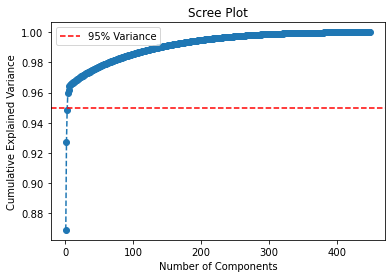

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Apply PCA
pca = PCA().fit(X_scaled)
explained_variance = np.cumsum(pca.explained_variance_ratio_)  # Cumulative variance

# Find the number of components that explain ~95% variance
n_components = np.argmax(explained_variance >= 0.95) + 1
print(f"Optimal number of components: {n_components}")

# Step 2: Scree Plot (Elbow Method)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.axhline(y=0.95, color='r', linestyle='--', label="95% Variance")
plt.legend()
plt.show()


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


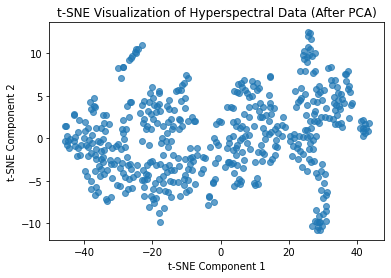

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Reduce dimensions to 32 using PCA
pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

# Apply t-SNE (max 2 or 3 components for visualization)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Visualize the t-SNE output
import matplotlib.pyplot as plt
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Hyperspectral Data (After PCA)")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

# Assuming `X_pca` is the PCA-reduced dataset and `y` is the target (DON concentration)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")


Training Set: (400, 4), Testing Set: (100, 4)


Random Forest Regressor

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Results:\nMAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")


Random Forest Results:
MAE: 1900.474, RMSE: 4003.175, R²: 0.943


In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build Neural Network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer (1 neuron for regression)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluate Model
y_pred_nn = model.predict(X_test).flatten()

# Calculate Metrics
mae_nn = mean_absolute_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Results:\nMAE: {mae_nn:.3f}, RMSE: {rmse_nn:.3f}, R²: {r2_nn:.3f}")


Epoch 1/100
25/25 [==============================] - 3s 12ms/step - loss: 153718624.0000 - mae: 3157.6392 - val_loss: 298978720.0000 - val_mae: 4409.8955
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 153692976.0000 - mae: 3155.0771 - val_loss: 298933504.0000 - val_mae: 4406.7861
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 153648416.0000 - mae: 3150.9431 - val_loss: 298849344.0000 - val_mae: 4401.6992
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 153578544.0000 - mae: 3144.8601 - val_loss: 298728928.0000 - val_mae: 4393.9629
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 153473328.0000 - mae: 3135.4319 - val_loss: 298529056.0000 - val_mae: 4382.6436
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 153308688.0000 - mae: 3123.6306 - val_loss: 298223328.0000 - val_mae: 4367.9937
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 15308097

LSTM

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reshape data: Convert (samples, features) → (samples, timesteps, features)
n_timesteps = X_pca.shape[1]  
X_lstm = X_pca.reshape((X_pca.shape[0], n_timesteps, 1))  # Reshaping for LSTM

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y, test_size=0.2, random_state=42)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")  # Should be (samples, timesteps, features)


Train Shape: (400, 4, 1), Test Shape: (100, 4, 1)


In [19]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

# Define the hypermodel function
def build_model(hp):
    model = Sequential([
        LSTM(units=hp.Choice('lstm_units_1', [32, 64, 128]), 
             return_sequences=True, 
             input_shape=(X_train.shape[1], X_train.shape[2])),
        BatchNormalization(),
        Dropout(hp.Choice('dropout_1', [0.2, 0.3, 0.4])),

        LSTM(units=hp.Choice('lstm_units_2', [32, 64, 128]), return_sequences=False),
        BatchNormalization(),
        Dropout(hp.Choice('dropout_2', [0.2, 0.3, 0.4])),

        Dense(hp.Choice('dense_units', [32, 64, 128]), activation='relu'),
        Dropout(hp.Choice('dropout_3', [0.2, 0.3, 0.4])),

        Dense(1)  # Regression output
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('lr', [0.001, 0.0005, 0.0001])),
                  loss='mse', metrics=['mae'])
    return model

# Hyperparameter tuning
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='tuning_results',
    project_name='lstm_hyperopt'
)

# Run the search
tuner.search(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Get best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best Hyperparameters: {best_hps.values}")

# Train the best model
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate performance
y_pred_best = best_model.predict(X_test).flatten()

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred_best)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2 = r2_score(y_test, y_pred_best)

print(f"Optimized LSTM Performance:\nMAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")


Reloading Tuner from tuning_results\lstm_hyperopt\tuner0.json
Best Hyperparameters: {'lstm_units_1': 128, 'dropout_1': 0.3, 'lstm_units_2': 64, 'dropout_2': 0.2, 'dense_units': 128, 'dropout_3': 0.4, 'lr': 0.001}
Epoch 1/100
13/13 [==============================] - 6s 97ms/step - loss: 153712080.0000 - mae: 3157.8909 - val_loss: 299002272.0000 - val_mae: 4412.6758
Epoch 2/100
13/13 [==============================] - 0s 21ms/step - loss: 153693536.0000 - mae: 3156.4893 - val_loss: 298996096.0000 - val_mae: 4412.3457
Epoch 3/100
13/13 [==============================] - 0s 18ms/step - loss: 153664304.0000 - mae: 3155.3843 - val_loss: 298985856.0000 - val_mae: 4411.9043
Epoch 4/100
13/13 [==============================] - 0s 23ms/step - loss: 153623408.0000 - mae: 3154.0959 - val_loss: 298968256.0000 - val_mae: 4411.3354
Epoch 5/100
13/13 [==============================] - 0s 19ms/step - loss: 153563968.0000 - mae: 3152.6169 - val_loss: 298949312.0000 - val_mae: 4410.8442
Epoch 6/100
13/13

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization, MaxPooling1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Reshape data for CNN
X_cnn = X_pca.reshape((X_pca.shape[0], X_pca.shape[1], 1))  # Shape: (samples, timesteps, channels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, random_state=42)

print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")  # Should be (samples, timesteps, channels)


Train Shape: (400, 4, 1), Test Shape: (100, 4, 1)


CNN

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Define the CNN Model
def build_cnn_model(input_shape):
    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.2),

        Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
        BatchNormalization(),
        Dropout(0.3),

        Flatten(),
        Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.3),

        Dense(64, activation='relu'),
        Dense(1, activation='linear')  # Regression Output
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])
    return model

# Assuming X_train.shape = (num_samples, num_wavelengths, 1)
input_shape = (X_train.shape[1], 1)  
model = build_cnn_model(input_shape)

# Early Stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=200, 
                    batch_size=32, 
                    callbacks=[early_stopping])

# Evaluate Performance
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae:.3f}")

# Predictions
y_pred = model.predict(X_test)


Epoch 1/200
13/13 [==============================] - 2s 26ms/step - loss: 153707600.0000 - mae: 3157.2869 - val_loss: 298961984.0000 - val_mae: 4411.1768
Epoch 2/200
13/13 [==============================] - 0s 11ms/step - loss: 153557904.0000 - mae: 3150.7197 - val_loss: 298871360.0000 - val_mae: 4408.0034
Epoch 3/200
13/13 [==============================] - 0s 11ms/step - loss: 153282400.0000 - mae: 3138.3452 - val_loss: 298551968.0000 - val_mae: 4400.6494
Epoch 4/200
13/13 [==============================] - 0s 9ms/step - loss: 152682528.0000 - mae: 3112.8564 - val_loss: 297715968.0000 - val_mae: 4384.4951
Epoch 5/200
13/13 [==============================] - 0s 9ms/step - loss: 150887808.0000 - mae: 3064.0825 - val_loss: 295927520.0000 - val_mae: 4349.1890
Epoch 6/200
13/13 [==============================] - 0s 9ms/step - loss: 148226864.0000 - mae: 2988.0410 - val_loss: 292527968.0000 - val_mae: 4286.5698
Epoch 7/200
13/13 [==============================] - 0s 11ms/step - loss: 14466

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y_test, y_pred, squared=False)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared Score

print(f"RMSE: {rmse:.3f}, R² Score: {r2:.3f}")


RMSE: 4319.646, R² Score: 0.933


c:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
